___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Calculating the hourly arrest rate

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [85]:
import pandas as pd
df = pd.read_csv("RI_cleaned.csv",skiprows =0).sample(n=50000, random_state = 1)

df.isnull()
df.isnull().sum()
pd.isnull(df["county_fips"])
bool_series = pd.isnull(df["county_fips"])
df[bool_series]
df.drop(["county_name","county_fips" ,"fine_grained_location"],axis=1,inplace=True)
df.shape
df.drop("state",axis=1,inplace=True)
df["driver_gender"].isnull().sum()
df.shape
df.dropna(subset = ["driver_gender"],inplace=True)
df.shape
df[["is_arrested"]].head(10)
df["is_arrested"]=df.is_arrested.astype("bool")
df["is_arrested"].dtype
combined = df.stop_date.str.cat(df.stop_time,sep=" ") #her iki serinin boyu aynı olmalıdır
df["stop_datetime"] = pd.to_datetime(combined)
df["stop_datetime"].dtype
df["stop_datetime"]
df = df.set_index(pd.DatetimeIndex(df["stop_datetime"]))
df.head()
day=pd.Timestamp("2005-01-02")
day.day_name()
df["violation"].value_counts() # Count the unique values in the violation to see what violations are being committed by all drivers.
df["violation"].value_counts(normalize=True) 
df_male = df[df["driver_gender"] == "M" ]
df_male.head() #The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.
df_female = df[df["driver_gender"] == "F"]
df_female.head()
df_female.violation.value_counts() # committed crimes by females
df_female.violation.value_counts(normalize=True) # to Express the counts as proportions we use normalize
df_male.violation.value_counts() # committed crimes by male
df_male.violation.value_counts(normalize=True) # violation proportions for male
female_speeding = df_female[df_female["violation"]== "Speeding" ]          #Comparing speeding outcomes by gender¶
male_speeding = df_male[df_male.violation == "Speeding"]
male_speeding.head()
female_speeding.head()
df_female.columns
female_speeding.stop_outcome.value_counts() #penalties for speeding male drivers
warning_prp_male = male_speeding.stop_outcome.value_counts(normalize=True)[1]
warning_prp_male # warning proportion for male drivers
warning_prp_fmale = female_speeding.stop_outcome.value_counts(normalize=True)[1]
warning_prp_fmale

df["search_conducted"].dtype
df["search_conducted"]=df.search_conducted.astype("bool")
df["search_conducted"].dtype
search = df[["search_conducted"]].sum() # only counts the true ones
df.search_conducted.value_counts(normalize=True) # Calculate the search rate by counting the values
df.search_conducted.mean() # Calculate the search rate by taking the mean
#df.loc[236912,['search_conducted', 'search_type_raw']]
df.columns
## Comparing search rates by gender
df_female[["search_conducted"]].mean()
df_male.search_conducted.value_counts(normalize=True)
#Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.
df_male[["search_conducted"]].mean()
df[["search_conducted","driver_gender"]].groupby("driver_gender").mean() # proportion of search for each gender
#Group by driver gender to calculate the search rate for both groups simultaneously. 
## Adding a second factor to the analysis
df.groupby(["driver_gender","violation"] ).search_conducted.mean()
df.columns
df.groupby(["violation","driver_gender"] ).search_conducted.mean()
## Counting protective frisks
df[df.search_type.notnull()][["search_type","driver_gender"] ]
df[df.search_type == "Protective Frisk"]["search_type"].count() # 89 times protective frisk was only search type
frisk_bool = df["frisk"] = df.search_type.str.contains("Protective Frisk",na = False)
df[df.frisk == True]["frisk"]
frisk_bool.dtype
frisk_sum = df[df.frisk == True]["frisk"].sum()
frisk_sum
import numpy as np
## Comparing frisk rates by gender
df_search = df[df.search_conducted == True]
df_search.head(3)
df_search.groupby(["driver_gender"]).frisk.mean()





driver_gender
F    0.075949
M    0.098922
Name: frisk, dtype: float64

# Calculating the hourly arrest rate¶

In [86]:
df["is_arrested"].mean()

0.03491436100131752

In [87]:
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()

In [88]:
hourly_arrest_rate

stop_datetime
0     0.046207
1     0.061641
2     0.059835
3     0.057866
4     0.056000
5     0.019417
6     0.014577
7     0.014561
8     0.020725
9     0.022533
10    0.027027
11    0.031028
12    0.032770
13    0.027305
14    0.032099
15    0.029493
16    0.034826
17    0.045390
18    0.038835
19    0.035878
20    0.035861
21    0.075691
22    0.048456
23    0.047536
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

In [89]:
import matplotlib.pyplot as plt

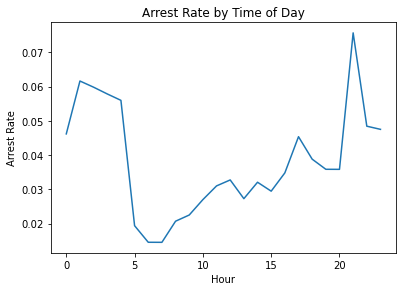

In [90]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes1.plot(hourly_arrest_rate)
axes1.set_xlabel("Hour")
axes1.set_ylabel("Arrest Rate")
axes1.set_title("Arrest Rate by Time of Day")
plt.show()

***

## Plotting drug-related stops

In [91]:
annual_drugs_rate = df.drugs_related_stop.groupby(df.index.hour).mean()
annual_drugs_rate

stop_datetime
0     0.023104
1     0.022173
2     0.015818
3     0.016275
4     0.024000
5     0.009709
6     0.002332
7     0.000857
8     0.005922
9     0.005134
10    0.006822
11    0.008403
12    0.006871
13    0.007123
14    0.005291
15    0.008651
16    0.005970
17    0.010638
18    0.008826
19    0.007634
20    0.008818
21    0.014556
22    0.013845
23    0.015961
Name: drugs_related_stop, dtype: float64

Text(0, 0.5, 'Drugs Rate')

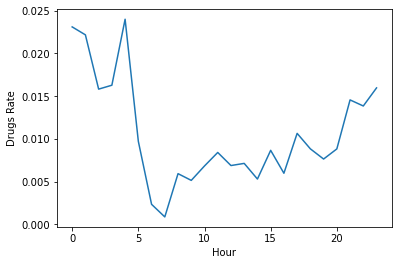

In [92]:
plt.plot(annual_drugs_rate)
plt.xlabel("Hour")
plt.ylabel("Drugs Rate")

***

## Comparing drug and search rates (to be deleted)

In [93]:
annual_drugs_rate = df.drugs_related_stop.groupby(df.index.year).mean()
annual_search_rate = df.search_conducted.groupby(df.index.year).mean()
annual_search_rate

stop_datetime
2005    0.045593
2006    0.044564
2007    0.044353
2008    0.042223
2009    0.049373
2010    0.043467
2011    0.037857
2012    0.034033
2013    0.030744
2014    0.029949
2015    0.027617
Name: search_conducted, dtype: float64

In [94]:
df.drugs_related_stop.resample("A").mean()

stop_datetime
2005-12-31    0.004559
2006-12-31    0.007027
2007-12-31    0.006982
2008-12-31    0.007657
2009-12-31    0.008020
2010-12-31    0.010212
2011-12-31    0.012381
2012-12-31    0.009875
2013-12-31    0.011916
2014-12-31    0.012957
2015-12-31    0.010907
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [95]:
annual = pd.concat([annual_drugs_rate,annual_search_rate],axis="columns")
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005,0.004559,0.045593
2006,0.007027,0.044564
2007,0.006982,0.044353
2008,0.007657,0.042223
2009,0.008020,0.049373
2010,0.010212,0.043467
2011,0.012381,0.037857
2012,0.009875,0.034033
2013,0.011916,0.030744


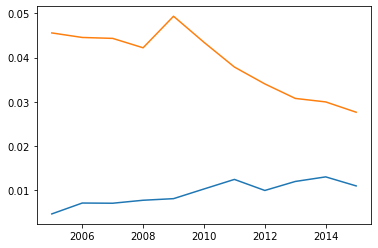

In [96]:
plt.plot(annual)

In [97]:
annual_drugs_rate

stop_datetime
2005    0.004559
2006    0.007027
2007    0.006982
2008    0.007657
2009    0.008020
2010    0.010212
2011    0.012381
2012    0.009875
2013    0.011916
2014    0.012957
2015    0.010907
Name: drugs_related_stop, dtype: float64

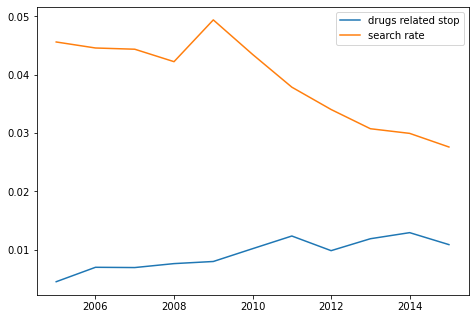

In [98]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(annual_drugs_rate,label="drugs related stop") # while drugs related stop increasing year by year search rate decreasing year by year
ax1.plot(annual_search_rate, label= "search rate")
plt.legend()

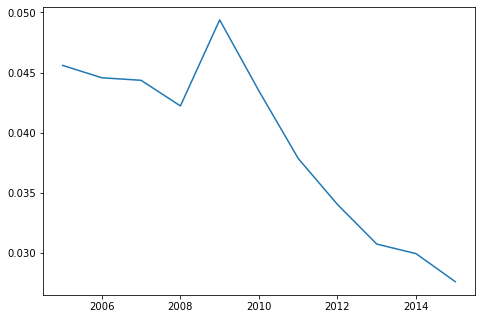

In [99]:
fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])
ax2.plot(annual_search_rate)

***

## Tallying violations by district

In [100]:
all_zones = pd.crosstab(df.location_raw,df.violation_raw)
all_zones

violation_raw,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
location_raw,,,,,,,,,,,,
Zone K1,3,23,371,11,682,52,0,97,3303,4,1,1
Zone K2,11,102,1140,11,1618,377,284,357,5636,7,30,2
Zone K3,7,117,1241,28,1559,392,351,203,6746,5,25,2
Zone X1,1,19,166,4,349,18,46,61,586,1,1,0
Zone X3,6,138,1090,34,1682,358,436,198,4755,3,33,7
Zone X4,11,324,1933,15,2881,701,473,449,5438,11,28,3


In [101]:
k_zones = all_zones.loc["Zone K1":"Zone K3"]

In [102]:
k_zones

violation_raw,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
location_raw,,,,,,,,,,,,
Zone K1,3,23,371,11,682,52,0,97,3303,4,1,1
Zone K2,11,102,1140,11,1618,377,284,357,5636,7,30,2
Zone K3,7,117,1241,28,1559,392,351,203,6746,5,25,2


In [103]:
df.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district', 'stop_datetime', 'frisk'],
      dtype='object')

***

## Plotting violations by district

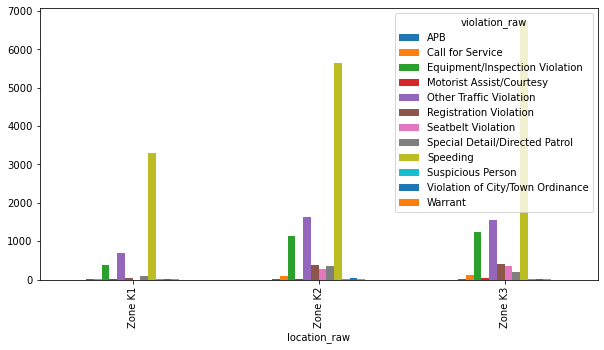

In [104]:
k_zones.plot(kind="bar",figsize=(10,5)) # most violation each zone is speeding violation

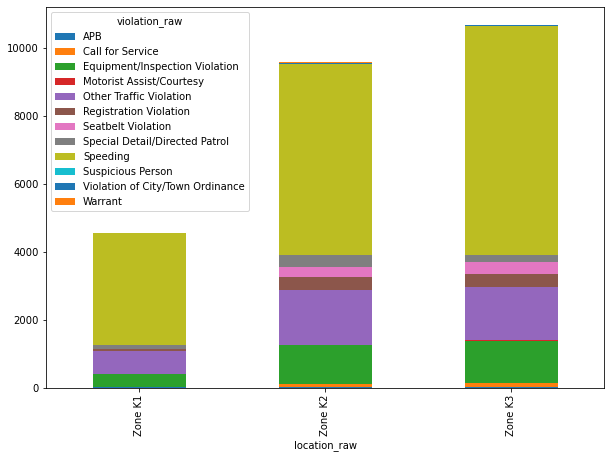

In [105]:
k_zones.plot(kind="bar",stacked=True,figsize=(10,7)) # less clear and understanable than non-stucked bar plot

***

## Converting stop durations to numbers

In [106]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '1'], dtype=object)

In [107]:
mapp = {"0-15 Min": 8,"16-30 Min":23, "30+ Min":45}

In [108]:
df["stop_minutes"] = df.stop_duration.map(mapp)
df

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-28 19:13:00,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0
2008-02-07 20:20:00,RI-2008-05302,2008-02-07,20:20,Zone K3,300,M,1967.0,41.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K3,2008-02-07 20:20:00,False,8.0
2008-01-26 19:59:00,RI-2008-03611,2008-01-26,19:59,Zone K3,300,M,1986.0,22.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone K3,2008-01-26 19:59:00,False,8.0
2014-12-28 17:23:00,RI-2014-50432,2014-12-28,17:23,Zone X4,500,F,1967.0,47.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X4,2014-12-28 17:23:00,False,8.0
2008-07-24 15:17:00,RI-2008-27455,2008-07-24,15:17,Zone K2,900,M,1941.0,67.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone K2,2008-07-24 15:17:00,False,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01 13:23:00,RI-2011-00069,2011-01-01,13:23,Zone X3,200,F,1963.0,48.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X3,2011-01-01 13:23:00,False,8.0
2009-04-21 11:02:00,RI-2009-15370,2009-04-21,11:02,Zone K3,300,M,1968.0,41.0,W,White,...,False,Citation,False,16-30 Min,True,False,Zone K3,2009-04-21 11:02:00,False,23.0
2008-08-15 15:21:00,RI-2008-30467,2008-08-15,15:21,Zone X4,500,M,1935.0,73.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-08-15 15:21:00,False,8.0


***

## Plotting stop length

In [109]:
stop_length = df.groupby("violation_raw").stop_minutes.mean()

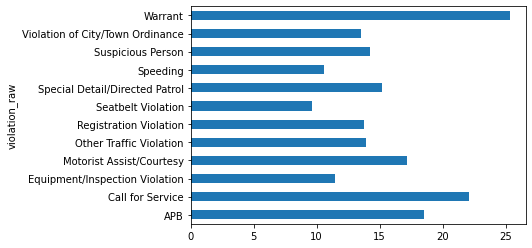

In [110]:
stop_length.plot(kind="barh")